## Problem Statement 

Insurance companies need to set the insurance premiums following the population trends despite having limited information about the insured population if they have to put themselves in a position to make profits. This makes it necessary to estimate the average medical care expenses based on trends in the population segments.

## Objective

Our aim is to estimate the `Charges` column using other columns given in the dataset. If we're able to estimate the medical care expenses data using historical data given then we can able to estimate for new customers as well by simply asking their few information like age, gender, bmi, children (dependents), smoking status and region and with the help of this, the insurance company can able to decide their insurance premiums so that they can be able to make profits simultaneously.

## Few questions need to ask before proceeding !

1. Historical data is available 
2. Target column is given - `Charges` (Supervised learning)
3. Datatype of target column - `Continuous` (Regression)
4. Models in use - All regression models
5. Evaluation Metrics - Mean Absolute Error

## Loading the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
d = pd.read_csv(r"C:\Users\isham\Downloads\insurance.csv")
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Copy original data for preventing the data loss

df = d.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Questions need to be answered

1. Which age group of beneficiary is contributing more to the medical expenses ?
2. Medical expenses ratio between male and female
3. Effect of dependents(Children) upon charges - Is their any relation between person with children are indulged in more medical expenses.
4. How smoking status among gender related to charges ?
5. Prove with an evidence that Female bmi is more as compared to male's bmi
6. Prove with an evidence that claims made by people who smoke are greater than people who don't smoke
7. Which region is contributing maximum to the charges ?
8. Are their more smokers ?
9. Is their any relation among bmi and smokers ?
10. How medical expenses differ between those are having healthy bmi and among those with high or low bmi ?

## Data Inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
print('Shape of the Data:', df.shape)
print('Columns in the Data:',df.columns.tolist())
d = {}
for i in df.select_dtypes(include='object').columns.tolist():
    d[i] = ', '.join(df[i].unique())

print('Unique categories among Categorical columns :',d)

Shape of the Data: (1338, 7)
Columns in the Data: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Unique categories among Categorical columns : {'sex': 'female, male', 'smoker': 'yes, no', 'region': 'southwest, southeast, northwest, northeast'}


Data is already in a clean format and datatypes are also correct hence no cleaning required as such for EDA

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
### Outliers Detection

def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

print('Age Outliers:',detect_outliers_iqr(df['age']))
print('BMI Outliers:',detect_outliers_iqr(df['bmi']))
print('Children Outliers:',detect_outliers_iqr(df['children']))
print('Charges Outliers:',detect_outliers_iqr(df['charges']))

Age Outliers: []
BMI Outliers: [47.41, 47.52, 47.6, 47.74, 48.07, 49.06, 50.38, 52.58, 53.13]
Children Outliers: []
Charges Outliers: [34617.84065, 34672.1472, 34779.615, 34806.4677, 34828.654, 34838.873, 35069.37452, 35147.52848, 35160.13457, 35491.64, 35585.576, 35595.5898, 36021.0112, 36085.219, 36124.5737, 36149.4835, 36189.1017, 36197.699, 36219.40545, 36307.7983, 36397.576, 36580.28216, 36837.467, 36898.73308, 36910.60803, 36950.2567, 37079.372, 37133.8982, 37165.1638, 37270.1512, 37465.34375, 37484.4493, 37607.5277, 37701.8768, 37742.5757, 37829.7242, 38126.2465, 38245.59327, 38282.7495, 38344.566, 38415.474, 38511.6283, 38709.176, 38711.0, 38746.3551, 38792.6856, 38998.546, 39047.285, 39125.33225, 39241.442, 39556.4945, 39597.4072, 39611.7577, 39722.7462, 39725.51805, 39727.614, 39774.2763, 39836.519, 39871.7043, 39983.42595, 40003.33225, 40103.89, 40182.246, 40273.6455, 40419.0191, 40720.55105, 40904.1995, 40932.4295, 40941.2854, 40974.1649, 41034.2214, 41097.16175, 41661.602,

Since original data is less hence not removing outliers at this moment of time.

## Exploratory Data Analysis (EDA)

## Univariate Analysis 

### Age Feature

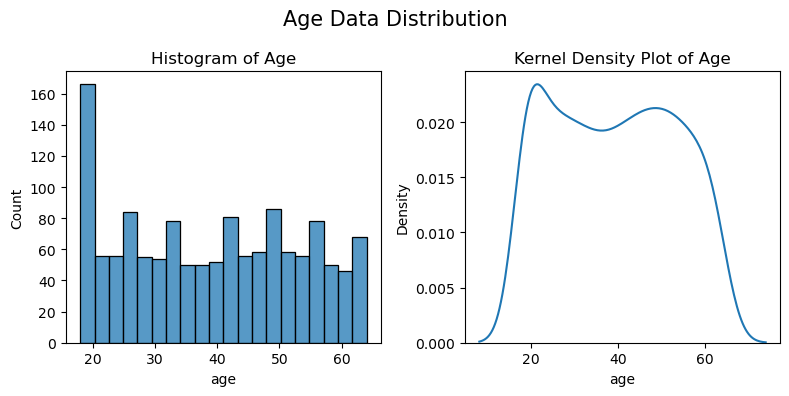

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.histplot(df['age'], bins=20, ax=axs[0])
axs[0].set_title('Histogram of Age')

sns.kdeplot(df['age'], ax=axs[1])
axs[1].set_title('Kernel Density Plot of Age')


plt.suptitle('Age Data Distribution', fontsize=15)

plt.tight_layout()
plt.show()

In [10]:
print('Average age of the peoples:',df['age'].mean())

Average age of the peoples: 39.20702541106129


In [11]:
age_counts = df['age'].value_counts().to_dict()
sorted_age_counts = dict(sorted(age_counts.items()))
print(sorted_age_counts, end=' ')

{18: 69, 19: 68, 20: 29, 21: 28, 22: 28, 23: 28, 24: 28, 25: 28, 26: 28, 27: 28, 28: 28, 29: 27, 30: 27, 31: 27, 32: 26, 33: 26, 34: 26, 35: 25, 36: 25, 37: 25, 38: 25, 39: 25, 40: 27, 41: 27, 42: 27, 43: 27, 44: 27, 45: 29, 46: 29, 47: 29, 48: 29, 49: 28, 50: 29, 51: 29, 52: 29, 53: 28, 54: 28, 55: 26, 56: 26, 57: 26, 58: 25, 59: 25, 60: 23, 61: 23, 62: 23, 63: 23, 64: 22} 

In [12]:
stats.uniform.cdf(x=20, loc=df['age'].min(), scale=df['age'].max())

0.03125

#### Observation-
The age feature exhibits a discrete uniform distribution, indicating that individuals of all ages have an equal likelihood of securing insurance. This suggests that any age group has the potential to incur medical expenses.

Average age of people securing insurance is approx 40. Age's of beneficiary lies between 18-64, although all age group is having equal chance of securing insurance but in the age group of 18-20 a spike can be seen in the data where collectively people with age of 18-20 is contributing to 3.125% in the data.

### Gender Feature 

In [13]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

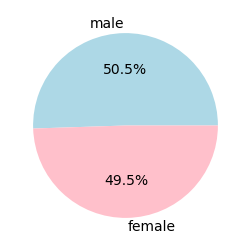

In [14]:
plt.figure(figsize=(3,3))
plt.pie(df['sex'].value_counts().values, labels=df['sex'].value_counts().index, autopct='%1.1f%%', colors=['lightblue','pink'])
plt.show()

#### Observation

50.5% of the beneficiary is Male and 49.5% of the beneficiary is Female. Approximately same number of male and female beneficiary is present in the data.

### BMI Feature

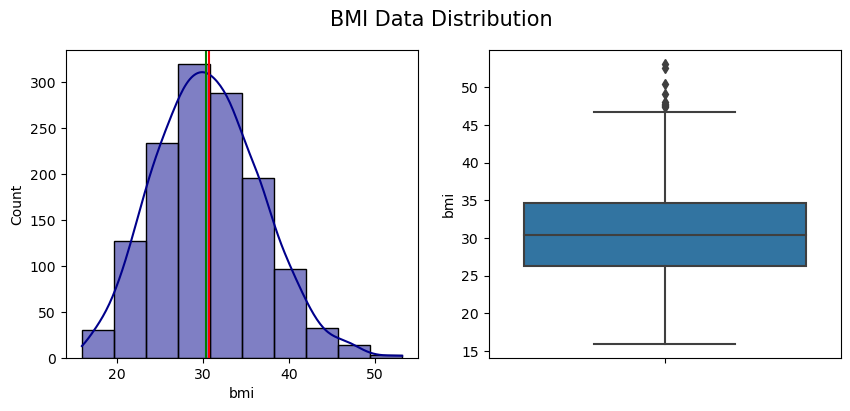

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(df['bmi'], bins=10, kde=True, ax=axs[0], color='darkblue')
axs[0].axvline(x=df['bmi'].median(), color='green')
axs[0].axvline(x=df['bmi'].mean(), color='red')

sns.boxplot(y='bmi', data=df, ax=axs[1])

plt.suptitle('BMI Data Distribution', fontsize=15)
plt.show()

### Observation- 

Since BMI data is following normal distribution, hence 68% of the bmi data falls between the range of 24.56 - 36.76. Which indicates that majority of the people's having their bmi in the range of 24.56-36.76. Average BMI of beneficiary is 30. This bmi range of majority customer is outside the normal range of ideal bmi. There are few outliers in the upper side.

### Children Feature

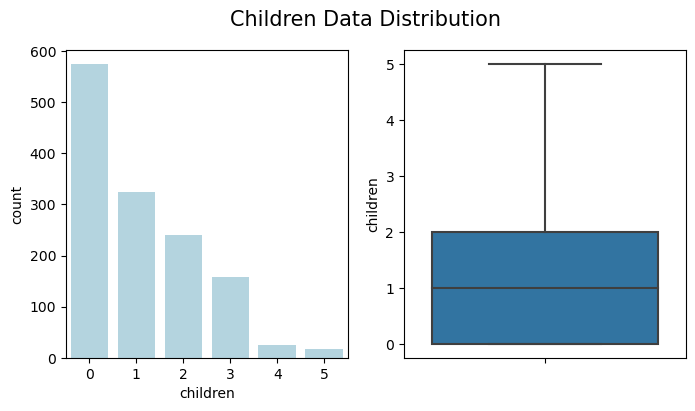

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.countplot(x='children', data=df, color='lightblue', ax=axs[0])

sns.boxplot(y='children', data=df, ax=axs[1])

plt.suptitle('Children Data Distribution', fontsize=15)
plt.show()

### Observation - 

Majority of the beneficiary having no children

### Smoker Feature

In [17]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

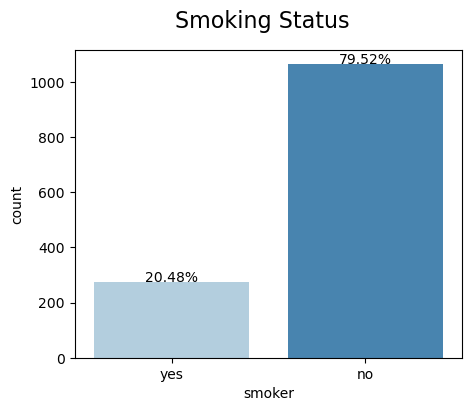

In [18]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x='smoker', data=df, palette='Blues')
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")
    
plt.suptitle('Smoking Status', fontsize=16)
plt.show()

#### Observation -

Approx 80% of beneficiary are non-smokers. 20% are smokers.

### Region Feature

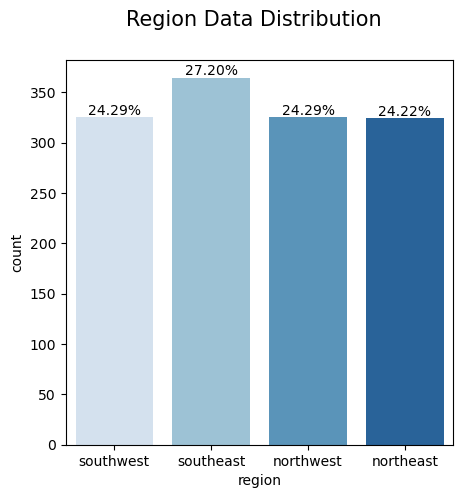

In [19]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='region', data=df, palette='Blues')
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

plt.suptitle('Region Data Distribution', fontsize=15)
plt.show()

#### Observation - 

Beneficiaries are evenly spread across all regions, with the Southeast having a slightly higher percentage of beneficiaries at 27%, while the other regions each have approximately 24%.

### Charges Feature - Target Column 

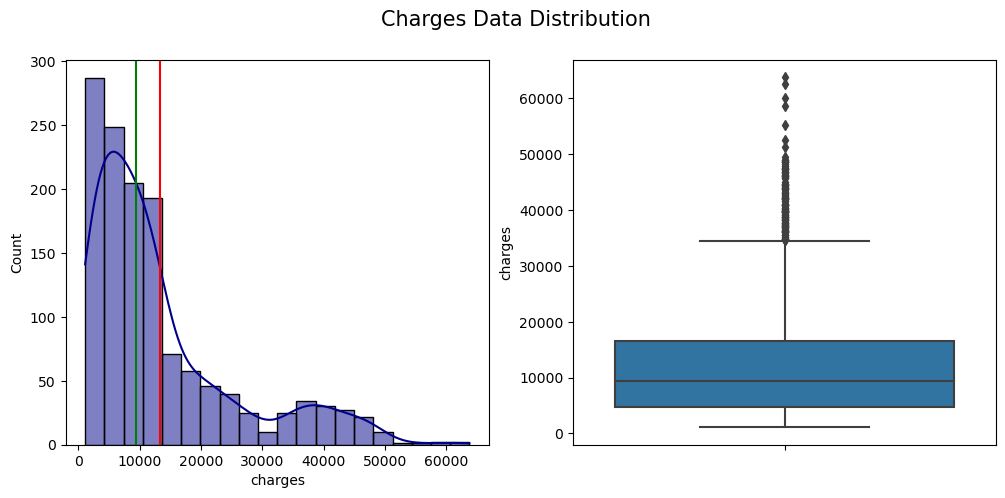

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['charges'], bins=20, kde=True, ax=axs[0], color='darkblue')
axs[0].axvline(x=df['charges'].median(), color='green')
axs[0].axvline(x=df['charges'].mean(), color='red')

sns.boxplot(y='charges', data=df, ax=axs[1])

plt.suptitle('Charges Data Distribution', fontsize=15)
plt.show()

#### Observation - 

Charges feature exibits right skewed distribution. Average cost incurred is around 13000 approx and highest charges is 63000. There is a huge number of outliers in the upper side of the data. 

## Bivariate Analysis

### Age & Charges 

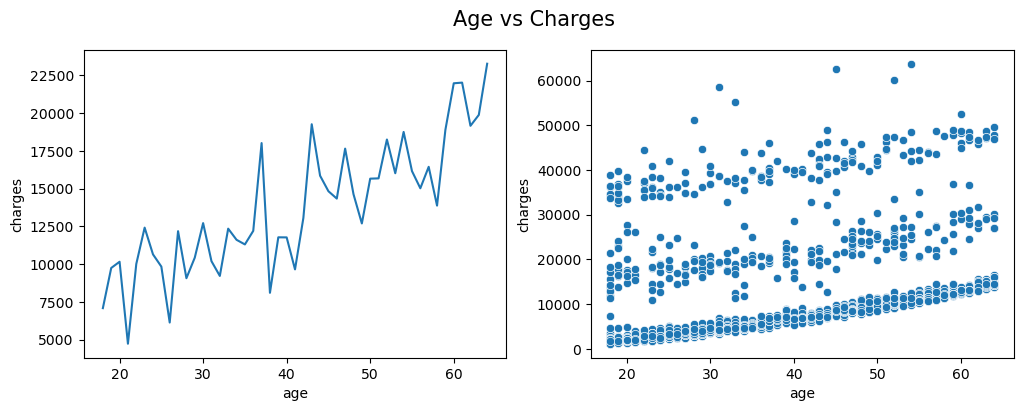

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x='age',y='charges',data=df, ax=axs[0],ci=None)
sns.scatterplot(x='age', y='charges', data=df, ax=axs[1])

plt.suptitle('Age vs Charges', fontsize=15)
plt.show()

In [22]:
#As the data is having outliers and it is not following linear relationship hence using spearman correlation coefficient
#since pearson captures linear relationship between two variables it will not give the accurate result

sp_corr, sp_pvalue = stats.spearmanr(df['age'], df['charges'])
print(f'Spearman Correlation Coefficient is {sp_corr}')
print(f'P_value is {sp_pvalue}')

Spearman Correlation Coefficient is 0.5343921337718459
P_value is 1.130692027803638e-99


#### Observation - 

There is a significant moderate positive relationship between Age and Charges feature, which suggest that as age increases simultaneously charges is also increasing following a monotonic relationship which means that Age & Charges are consistently moves in the same direction either increasing or decreasing but not necessarily at a constant rate. 

It's also valid to suggest that with increasing age comes with higher charges, indicating that older beneficiaries are making a more substantial contribution towards charges.

### Gender & Charges

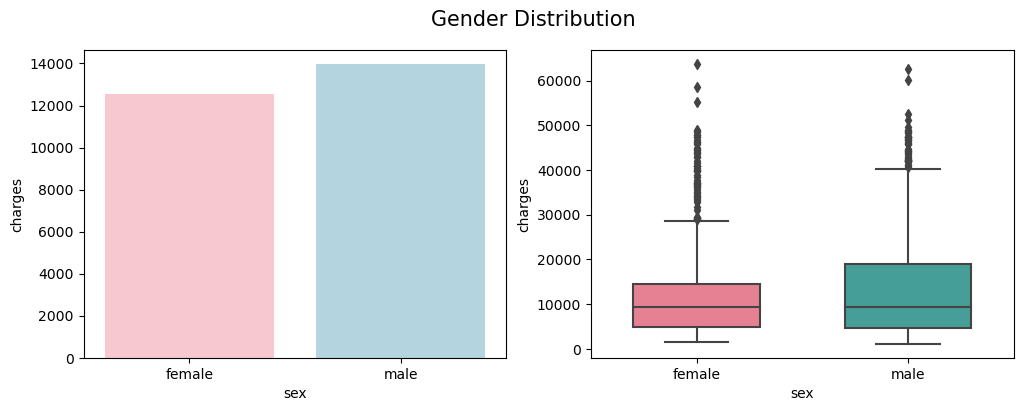

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(x='sex',y='charges',data=df,palette=['pink','lightblue'], ci=None, ax=axs[0])
sns.boxplot(x='sex', y='charges', data=df,palette='husl', width=0.6, ax=axs[1])
plt.suptitle('Gender Distribution', fontsize=15)
plt.show()

In [24]:
male_expenses = df[df['sex'] == 'male']['charges'].sum()
female_expenses = df[df['sex'] == 'female']['charges'].sum()

medical_expense_ratio = male_expenses / female_expenses
print("Medical Expense Ratio (Male to Female):", medical_expense_ratio)

Medical Expense Ratio (Male to Female): 1.1338414146312492


### Observation - 

Male beneficiary are contributing more towards charges which means male policy holders are having a slight edge over females policy holders. More number of outliers are present in female category. Total medical expenses for males are approximately **1.134** times higher than the total medical expenses for females. 

### Gender vs Numerical Input Columns

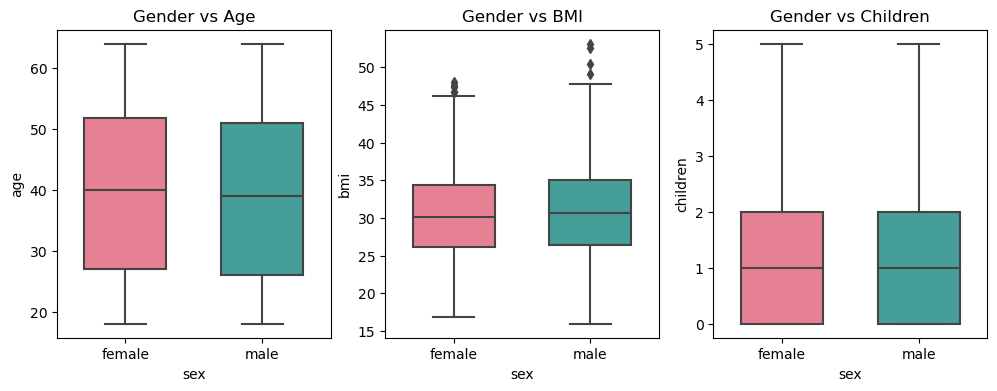

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.boxplot(x='sex',y='age',data=df, palette='husl', width=0.6, ax=axs[0])
axs[0].set_title('Gender vs Age')

sns.boxplot(x='sex',y='bmi',data=df, palette='husl', width=0.6, ax=axs[1])
axs[1].set_title('Gender vs BMI')

sns.boxplot(x='sex',y='children',data=df, palette='husl', width=0.6, ax=axs[2])
axs[2].set_title('Gender vs Children')

plt.show()

### Prove with an evidence that Male bmi is more as compared to Female's bmi

### Hypothesis Testing

`Step 1`: **Define Null and Alternate Hypothesis**

**Null Hypothesis (H0):** There is no difference between Male's bmi and Female's bmi (u1 = u2)

**Alternate Hypothesis (Ha)** The average bmi of male is greater than the average bmi of female (u1 > u2)

`Step 2`: **Data collection from the population**

In [26]:
male_bmi = df[df['sex']=='male']['bmi']
female_bmi = df[df['sex']=='female']['bmi']

`Step 3`: **Selecting significance level**

Considering significance level of 5% 

Alpha = 0.05

`Step 4`: **Check Assumptions**

1. Independence of Observations - Male bmi and Female bmi are independent samples from each other. There is no relationship between them, changing in once will not affect the other sample.

2. Random Sampling - Assuming that the data collection done by the company is following random sampling.

3. Normality - Both the samples is having sample size greater than 30. Central limit theorem will be applied and it will be considered as normaly distributed data.

`Step 5`: **Define Suitable Test**

## T-test

Since the population standard devaition is not known, we will use t-test and since there are two samples are involved we will use Independent t-test. There is greater than (>) symbol mentioned hence it is one tailed right test.

`Step 6`: **Conducting the test**

In [27]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(male_bmi, female_bmi)
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: 1.696752635752224
p-value: 0.08997637178984932


`Step 7`: **Interpreting Results**

In [28]:
if p_value < 0.05:
    print(f'Conclusion: Since P-value {p_value} is less than alpha 0.05')
    print("Reject Null Hypothesis (H0) that there is no difference between male's bmi and female's bmi")
else:
    print(f'Conclusion: Since P-value {p_value} is greater than alpha 0.05')
    print("Reject Alternate Hypothesis (Ha) that male's bmi is greater than female's bmi")

Conclusion: Since P-value 0.08997637178984932 is greater than alpha 0.05
Reject Alternate Hypothesis (Ha) that male's bmi is greater than female's bmi


### Observations - 

1. Average age of female policy holder is slightly higher as compared to male policy holder
2. - Our Visual Observation - Male's bmi is higher as compared to female's bmi. 
   - Hypothesis Test results - There is no difference between Male's bmi and Female's bmi
3. More number of outliers are present in male's bmi in the upper side.
3. Both Male and Female having same number of children.

### BMI & Charges

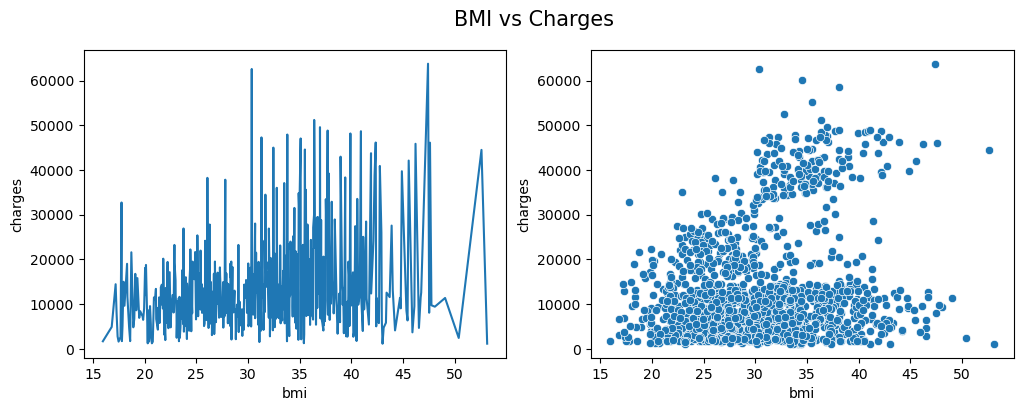

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x='bmi',y='charges',data=df, ax=axs[0], ci=None)
sns.scatterplot(x='bmi', y='charges', data=df, ax=axs[1])

plt.suptitle('BMI vs Charges', fontsize=15)
plt.show()

In [30]:
sp_corr, sp_pvalue = stats.spearmanr(df['bmi'], df['charges'])
print(f'Spearman Correlation Coefficient is {sp_corr}')
print(f'P_value is {sp_pvalue}')

Spearman Correlation Coefficient is 0.11939590358331145
P_value is 1.1926059544526874e-05


In [31]:
df_healthybmi = df.query('bmi >=18.5 and bmi<=24.9')[['bmi','charges']]
df_lowbmi = df.query('bmi<18.5')[['bmi','charges']]
df_highbmi = df.query('bmi>25')[['bmi','charges']]

healthy_high_ratio = df_highbmi['charges'].sum()/df_healthybmi['charges'].sum()
print(f'Medical expense ratio between high bmi people to healthy bmi people is {healthy_high_ratio}')

low_healthy_ratio = df_healthybmi['charges'].sum()/df_lowbmi['charges'].sum()
print(f'Medical expense ratio between healthy bmi people to low bmi people is {low_healthy_ratio}')

Medical expense ratio between high bmi people to healthy bmi people is 6.603281914051017
Medical expense ratio between healthy bmi people to low bmi people is 13.015119339051894


### Observation -

1. A very weak positive correlation is being observed between BMI and Charges
2. Policyholders with high BMI tends to contribute to charges approximately **6.6** times more than those who are having healthy BMI. This implies that individuals with high BMI may require more medical attention or incur higher healthcare costs, which can contribute to increased insurance charges.
3. Policyholders with a healthy BMI tends to contribute to charges approximately **13** times more than those with a low BMI.

### Smoker & Charges

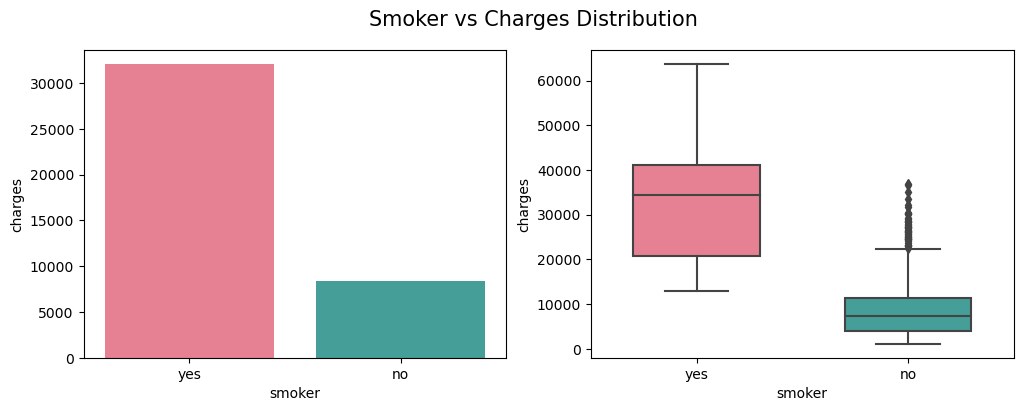

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(x='smoker',y='charges',data=df,palette='husl', ci=None, ax=axs[0])
sns.boxplot(x='smoker', y='charges', data=df,palette='husl', width=0.6, ax=axs[1])
plt.suptitle('Smoker vs Charges Distribution', fontsize=15)
plt.show()

### Smoker & Numerical Input Columns

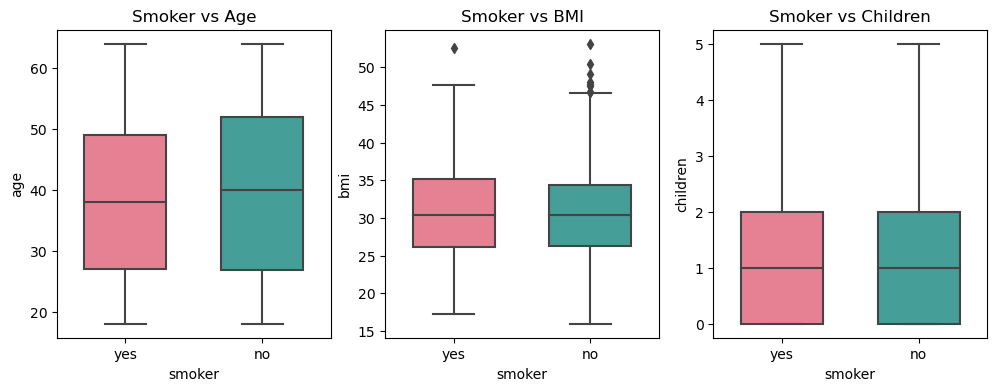

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.boxplot(x='smoker',y='age',data=df, palette='husl', width=0.6, ax=axs[0])
axs[0].set_title('Smoker vs Age')

sns.boxplot(x='smoker',y='bmi',data=df, palette='husl', width=0.6, ax=axs[1])
axs[1].set_title('Smoker vs BMI')

sns.boxplot(x='smoker',y='children',data=df, palette='husl', width=0.6, ax=axs[2])
axs[2].set_title('Smoker vs Children')

plt.show()

### Smoker & Categorical Input Columns

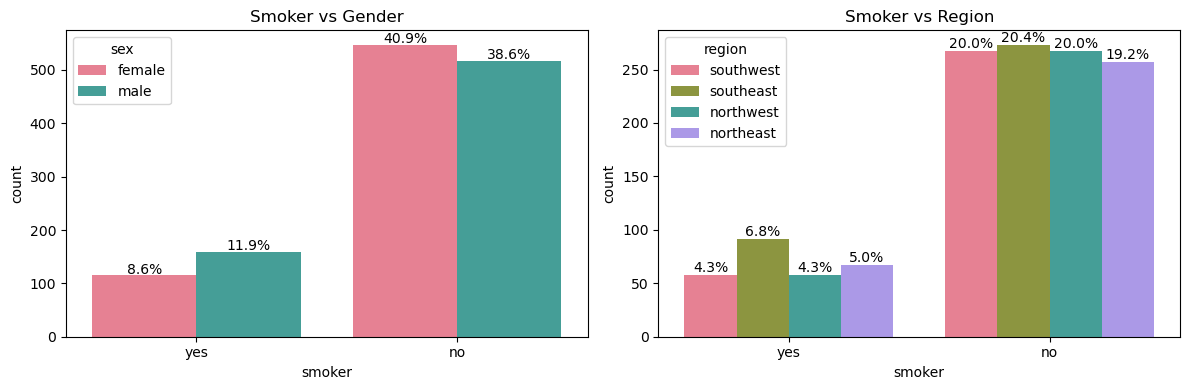

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='smoker', hue='sex', data=df, palette='husl', ax=axs[0])
axs[0].set_title('Smoker vs Gender')

total = len(df)
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

sns.countplot(x='smoker', hue='region', data=df, palette='husl', ax=axs[1])
axs[1].set_title('Smoker vs Region')

for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

plt.tight_layout()
plt.show()

### Prove with an evidence that claims made by people who smoke are greater than people who don't smoke

### Hypothesis Testing

`Step 1`: **Define Null and Alternate Hypothesis**

**Null Hypothesis (H0):** The average charges of smokers is less than or equal to average charges of non-smokers (u1 <= u2)

**Alternate Hypothesis (Ha)** The average charges of smokers is greater than average charges of non-smokers (u1 > u2)

`Step 2`: **Data collection from the population**

In [35]:
smoker = df[df['smoker']=='yes']['charges']
non_smoker = df[df['smoker']=='no']['charges']

`Step 3`: **Selecting significance level**

Considering significance level of 5% 

Alpha = 0.05

`Step 4`: **Check Assumptions**

1. Independence of Observations - Smokers and non-smokers are independent samples from each other. There is no relationship between them, changing in once will not affect the other sample.

2. Random Sampling - Assuming that the data collection done by the company is following random sampling.

3. Normality - Both the samples is having sample size greater than 30. Central limit theorem will be applied and it will be considered as normaly distributed data.

`Step 5`: **Define Suitable Test**

## T-test

Since the population standard devaition is not known, we will use t-test and since there are two samples are involved we will use Independent t-test. There is greater than (>) symbol mentioned hence it is one tailed right test.

`Step 6`: **Conducting the test**

In [36]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(smoker, non_smoker)
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: 46.66492117272371
p-value: 8.271435842179102e-283


`Step 7`: **Interpreting Results**

In [37]:
if p_value < 0.05:
    print(f'Conclusion: Since P-value {p_value} is less than alpha 0.05')
    print('Reject Null Hypothesis (H0) that average claims made by smoker is less than or equal to average claims made by non-smoker')
else:
    print(f'Conclusion: Since P-value {p_value} is greater than alpha 0.05')
    print('Reject Alternate Hypothesis (Ha) that average claims made by smoker is greater than average claims made by non-smoker')

Conclusion: Since P-value 8.271435842179102e-283 is less than alpha 0.05
Reject Null Hypothesis (H0) that average claims made by smoker is less than or equal to average claims made by non-smoker


### Observation - 

1. People's who smoke tends to contribute more for medical expenses cost as compared to non-smokers, which means smokers made higher number of claims. Proved with evidence of p_value 8.271435842179102e-283 is less than alpha 0.05, which is approx 0 and it is confirmed with very strong evidence.
2. People's who don't smoke have more number of outliers in the upper side. 
3. There are lot of outliers in non-smokers with high BMI values.
4. Smokers and non-smokers have no indifference with children.
5. More number of smokers are male compared to female.
6. Majority of smokers comes from southeast region.

### Children & Charges

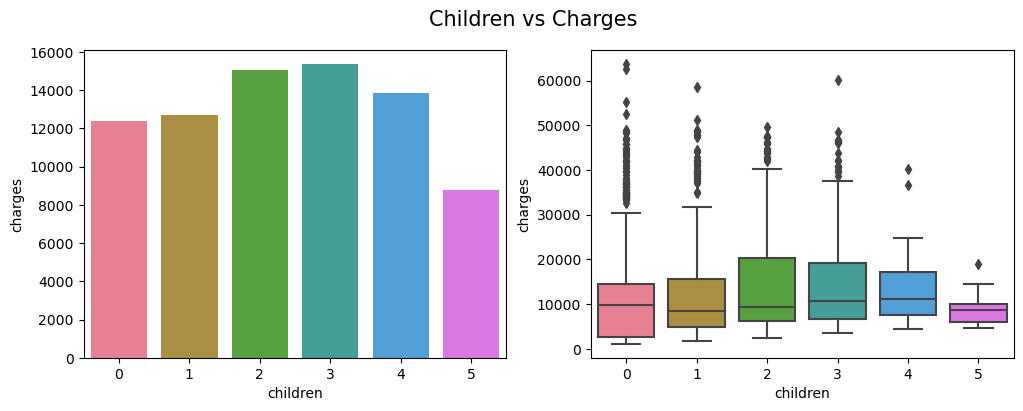

In [38]:
fig, axs = plt.subplots(1,2, figsize=(12,4))

sns.barplot(x='children',y='charges',data=df, palette='husl',ci=None, ax=axs[0])
sns.boxplot(x='children',y='charges',data=df, palette='husl',ax=axs[1])

plt.suptitle('Children vs Charges', fontsize=15)

plt.show()

### Observation - 

Policy holders having 2 or 3 children are involved more in medical expenses. Beneficiaries having more than 3 dependents seems to contribute very less towards medical expenses which is very unusual behaviour. It might be due to less amount of data present related to peoples having 4 or 5 dependents.

Huge number of outliers is present in the case of people's having no dependents. There could be many reasons

### Region & Charges

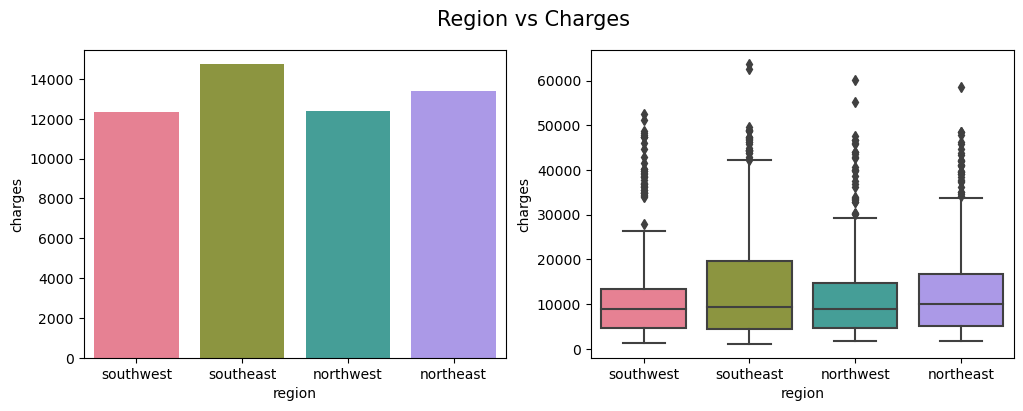

In [39]:
fig, axs = plt.subplots(1,2, figsize=(12,4))

sns.barplot(x='region',y='charges',data=df, palette='husl',ci=None, ax=axs[0])
sns.boxplot(x='region',y='charges',data=df, palette='husl',ax=axs[1])

plt.suptitle('Region vs Charges', fontsize=15)

plt.show()

### Region & Input Columns

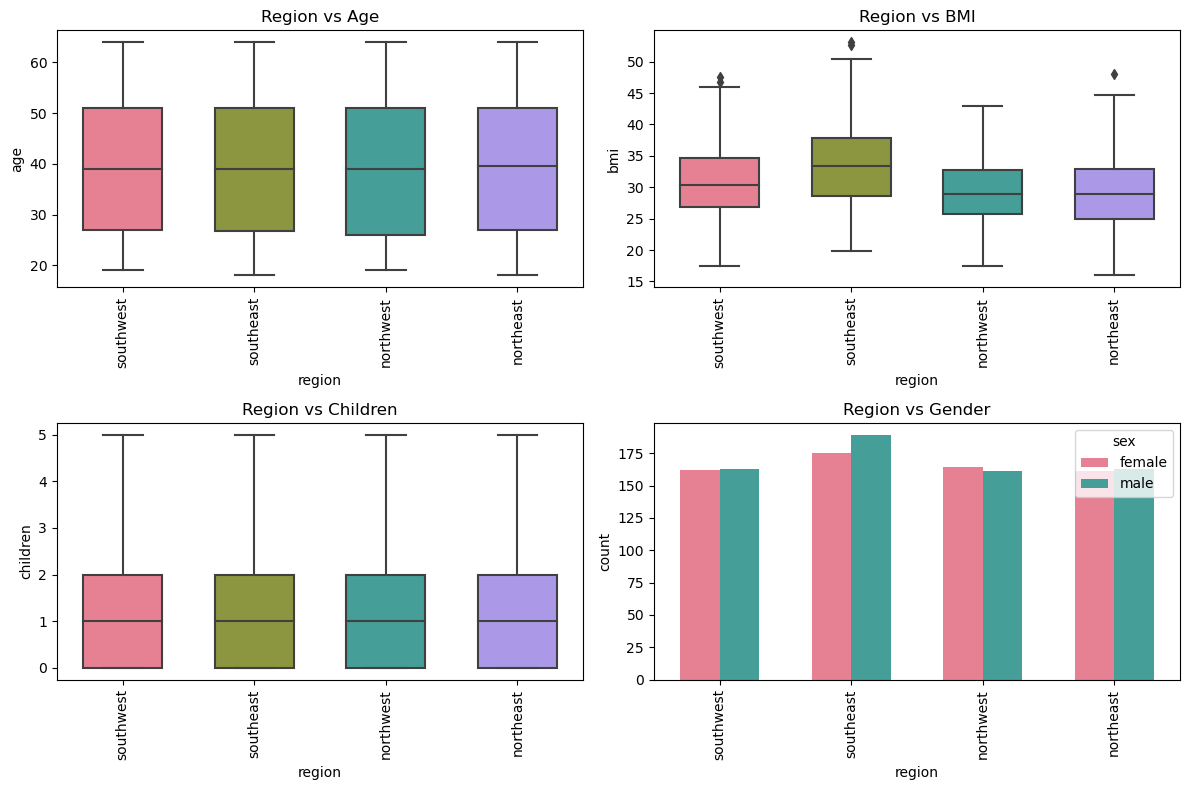

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(x='region', y='age', data=df, palette='husl', width=0.6, ax=axs[0, 0])
axs[0, 0].set_title('Region vs Age')
axs[0, 0].tick_params(axis='x', rotation=90)

sns.boxplot(x='region', y='bmi', data=df, palette='husl', width=0.6, ax=axs[0, 1])
axs[0, 1].set_title('Region vs BMI')
axs[0, 1].tick_params(axis='x', rotation=90)

sns.boxplot(x='region', y='children', data=df, palette='husl', width=0.6, ax=axs[1, 0])
axs[1, 0].set_title('Region vs Children')
axs[1, 0].tick_params(axis='x', rotation=90)

sns.countplot(x='region', hue='sex', data=df, palette='husl', width=0.6, ax=axs[1, 1])
axs[1, 1].set_title('Region vs Gender')
axs[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()  
plt.show()

### Observation - 

1. Southeast region is contributing more towards medical expenses followed by northeast
2. There is no difference between region and age, which suggest that any age people can come from any region.
3. Beneficiaries from southeast are tends to have more bmi exceeding the healthy bmi range.
4. There is no difference between region and children, which means that people are having 0 to 2 dependents from each region.
5. More number of male beneficiaries is coming from southeast region.

## Multivariate Analysis

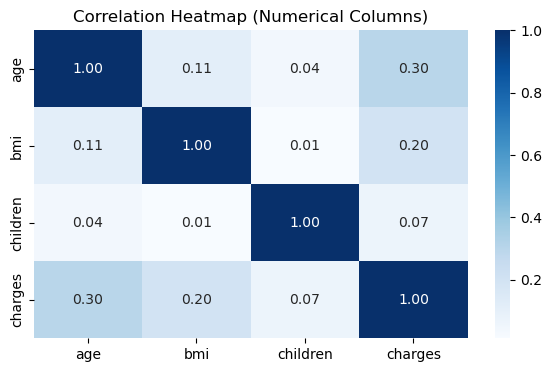

In [41]:
numerical_df = df.select_dtypes(include=['int', 'float'])

plt.figure(figsize=(7, 4))
sns.heatmap(numerical_df.corr(), annot=True,cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

### Age, Gender & Charges

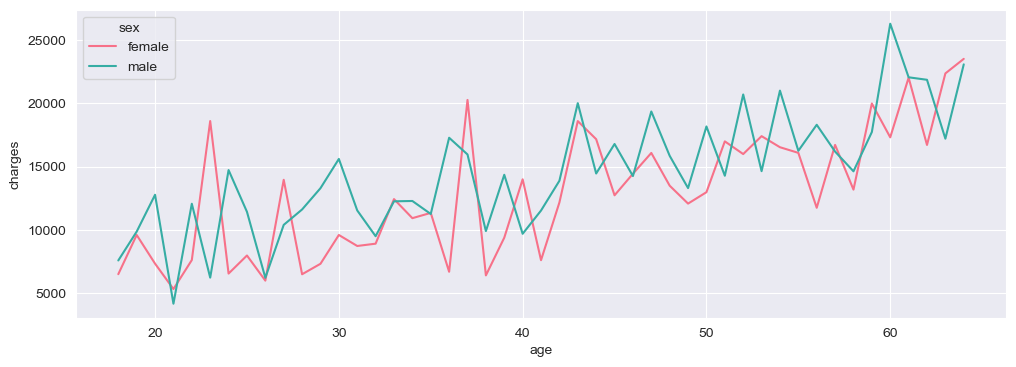

In [42]:
plt.figure(figsize=(12,4))
sns.set_style("darkgrid")
sns.lineplot(x=df['age'], y=df['charges'],hue='sex',data=df, palette='husl', ci=None)
plt.show()

### Observation - 

1. Charges incurred for male is more as compared with females
2. With increasing age, charges is increases for both male and female
3. There are some spikes for female at age approx 23,37,43.

### Age, BMI, Smoker, Gender & Charges

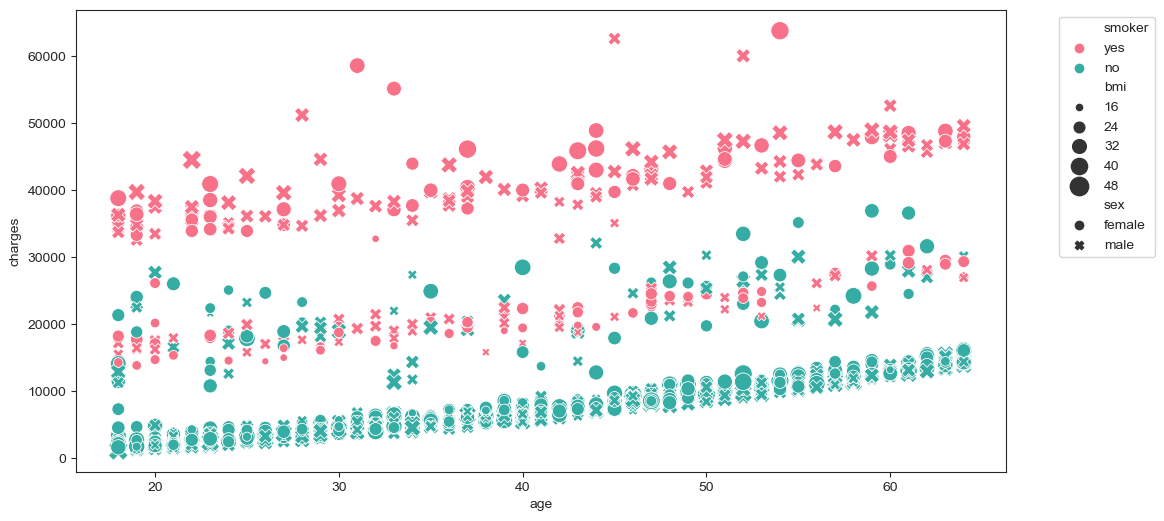

In [43]:
plt.figure(figsize=(12,6))
sns.set_style("ticks")
sns.scatterplot(x='age', y='charges', hue='smoker', style='sex', size='bmi', data=df, palette='husl', sizes=(20, 200))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Observation - 

1. Male who smokes and having moderate to high bmi tends to contribute more for medical expenses
2. As age increases, claims are also increases whether a person is a smoker or non-smoker but smokers are having higher claims

## Conclusions - 

1. As age increases, claims made by policy holders are also increases hence the cost of insurances increase. It's also valid to suggest that with increasing age comes with higher charges, indicating that older beneficiaries are making a more substantial contribution towards charges.
2. Average age of female policy holder is slightly higher as compared to male policy holder
3. Males who smoke have made higher claims. 20% are total smokers in the data out of which approx **12%** is the males.
4. Females who are non-smoker are also having higher claims compared with male non-smokers, may be because of many oher reasons.
5. Person who smoke and having BMI more than 30 (high bmi) has significantly higher medical charges. 
6. Policyholders with high BMI tends to contribute to charges approximately **6.6** times more than those who are having healthy BMI. Policyholders with a healthy BMI tends to contribute to charges approximately **13** times more than those with a low BMI.
7. There is no difference between Male's bmi and Female's bmi, statistically proved wth evidence.
8. Policy holders having 2 or 3 children are involved more in medical expenses. 
9. Beneficiaries having more than 3 dependents seems to contribute very less towards medical expenses which is very unusual behaviour. It might be due to less amount of data present related to peoples having 4 or 5 dependents.
9. Southeast region is contributing more towards medical expenses. Beneficiaries from southeast are tends to have more bmi exceeding the healthy bmi range. 
10. More number of male beneficiaries is coming from southeast region. 
11. **6.8%** of the smokers belongs from southeast region.
12. Age, Smoking status and BMI are the most important attributes which are contributing more towards medical expenses.

## Data Preprocessing

In [44]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Segregating input columns and target column

In [45]:
y = df['charges']
x = df.drop('charges',axis=1)

In [46]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [47]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


## Spliting the data into train & test

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.75, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1003, 6) (1003,)
(335, 6) (335,)


## Separating Categorical and Numerical columns form x_train data

In [49]:
x_train.head()

,age,sex,bmi,children,smoker,region
693,24,male,23.655,0,no,northwest
1297,28,female,26.510,2,no,southeast
634,51,male,39.700,1,no,southwest
1022,47,male,36.080,1,yes,southeast
178,46,female,28.900,2,no,southwest


In [50]:
x_train_cat = x_train.select_dtypes(include='object')
x_train_cat.head()

,sex,smoker,region
693,male,no,northwest
1297,female,no,southeast
634,male,no,southwest
1022,male,yes,southeast
178,female,no,southwest


In [51]:
x_train_num = x_train.select_dtypes(include=['int64','float64'])
x_train_num.head()  #Since children is already in the range of 0-5, rescalling not required 

,age,bmi,children
693,24,23.655,0
1297,28,26.510,2
634,51,39.700,1
1022,47,36.080,1
178,46,28.900,2


In [52]:
#Processing BMI and Age feature for standardization, except children feature

x_train_num_bmi_age = x_train_num[['age','bmi']]
x_train_num_bmi_age.head()

,age,bmi
693,24,23.655
1297,28,26.510
634,51,39.700
1022,47,36.080
178,46,28.900


In [53]:
x_train_num_children = x_train_num[['children']]
x_train_num_children.head()

,children
693,0
1297,2
634,1
1022,1
178,2


### i) Scalling numerical column

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_num_bmi_age_rescaled = pd.DataFrame(scaler.fit_transform(x_train_num_bmi_age),
                                         columns = x_train_num_bmi_age.columns,
                                         index = x_train_num_bmi_age.index)

x_train_num_bmi_age_rescaled.head()

,age,bmi
693,-1.087167,-1.140875
1297,-0.802106,-0.665842
634,0.836992,1.528794
1022,0.551932,0.926476
178,0.480667,-0.268178


### Concatenating rescaled BMI, Age and Children feature

In [55]:
x_train_num_rescaled = pd.concat([x_train_num_bmi_age_rescaled, x_train_num_children], axis=1)
x_train_num_rescaled.head()

,age,bmi,children
693,-1.087167,-1.140875,0
1297,-0.802106,-0.665842,2
634,0.836992,1.528794,1
1022,0.551932,0.926476,1
178,0.480667,-0.268178,2


### ii) Applying OneHotEncoder to Categorical column

In [56]:
#All the featues are nominal, hence applying OneHotEncoding

In [57]:
x_train_cat.head()

,sex,smoker,region
693,male,no,northwest
1297,female,no,southeast
634,male,no,southwest
1022,male,yes,southeast
178,female,no,southwest


In [58]:
x_train_cat['sex'].value_counts(normalize=True)

sex
male      0.504487
female    0.495513
Name: proportion, dtype: float64

In [59]:
x_train_cat['smoker'].value_counts(normalize=True)

smoker
no     0.794616
yes    0.205384
Name: proportion, dtype: float64

In [60]:
x_train_cat['region'].value_counts(normalize=True)

region
southeast    0.258225
northeast    0.250249
southwest    0.246261
northwest    0.245264
Name: proportion, dtype: float64

In [61]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

x_train_cat_ohe = pd.DataFrame(encoder.fit_transform(x_train_cat),
                              columns = encoder.get_feature_names_out(x_train_cat.columns),
                              index = x_train_cat.index)

x_train_cat_ohe.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
693,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1297,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
634,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1022,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
178,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [62]:
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

## Concatenating Encoded categorical and scaled numerical column

In [63]:
x_train_num_rescaled.head()

,age,bmi,children
693,-1.087167,-1.140875,0
1297,-0.802106,-0.665842,2
634,0.836992,1.528794,1
1022,0.551932,0.926476,1
178,0.480667,-0.268178,2


In [64]:
x_train_cat_ohe.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
693,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1297,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
634,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1022,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
178,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [65]:
x_train_transformed = pd.concat([x_train_num_rescaled,x_train_cat_ohe], axis=1)
x_train_transformed.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
693,-1.087167,-1.140875,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1297,-0.802106,-0.665842,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
634,0.836992,1.528794,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1022,0.551932,0.926476,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
178,0.480667,-0.268178,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Processing x-test data

In [66]:
x_test.head()

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast
887,36,female,30.020,0,no,northwest
890,64,female,26.885,0,yes,northwest
1293,46,male,25.745,3,no,northwest
259,19,male,31.920,0,yes,northwest


## Separating Categorical and Numerical columns form x_test data

In [67]:
x_test_cat = x_test.select_dtypes(include='object')
x_test_cat.head()

,sex,smoker,region
764,female,no,northeast
887,female,no,northwest
890,female,yes,northwest
1293,male,no,northwest
259,male,yes,northwest


In [68]:
x_test_num = x_test.select_dtypes(include=['int64','float64'])
x_test_num.head()  #Since children is already in the range of 0-5, rescalling not required 

,age,bmi,children
764,45,25.175,2
887,36,30.020,0
890,64,26.885,0
1293,46,25.745,3
259,19,31.920,0


In [69]:
#Processing BMI and Age feature for standardization, except children feature

x_test_num_bmi_age = x_test_num[['age','bmi']]
x_test_num_bmi_age.head()

,age,bmi
764,45,25.175
887,36,30.020
890,64,26.885
1293,46,25.745
259,19,31.920


In [70]:
x_test_num_children = x_test_num[['children']]
x_test_num_children.head()

,children
764,2
887,0
890,0
1293,3
259,0


### i) Scalling numerical column

In [71]:
x_test_num_bmi_age_rescaled = pd.DataFrame(scaler.transform(x_test_num_bmi_age),
                                         columns = x_test_num_bmi_age.columns,
                                         index = x_test_num_bmi_age.index)

x_test_num_bmi_age_rescaled.head()

,age,bmi
764,0.409402,-0.887967
887,-0.231985,-0.081825
890,1.763439,-0.603447
1293,0.480667,-0.793127
259,-1.443492,0.234309


### Concatenating rescaled BMI, Age and Children feature

In [72]:
x_test_num_rescaled = pd.concat([x_test_num_bmi_age_rescaled, x_test_num_children], axis=1)
x_test_num_rescaled.head()

,age,bmi,children
764,0.409402,-0.887967,2
887,-0.231985,-0.081825,0
890,1.763439,-0.603447,0
1293,0.480667,-0.793127,3
259,-1.443492,0.234309,0


### ii) Applying OneHotEncoder to Categorical column

In [73]:
x_test_cat.head()

,sex,smoker,region
764,female,no,northeast
887,female,no,northwest
890,female,yes,northwest
1293,male,no,northwest
259,male,yes,northwest


In [74]:
x_test_cat['sex'].value_counts(normalize=True)

sex
male      0.507463
female    0.492537
Name: proportion, dtype: float64

In [75]:
x_test_cat['smoker'].value_counts(normalize=True)

smoker
no     0.797015
yes    0.202985
Name: proportion, dtype: float64

In [76]:
x_test_cat['region'].value_counts(normalize=True)

region
southeast    0.313433
northwest    0.235821
southwest    0.232836
northeast    0.217910
Name: proportion, dtype: float64

In [77]:
x_test_cat_ohe = pd.DataFrame(encoder.transform(x_test_cat),
                             columns = encoder.get_feature_names_out(x_test_cat.columns),
                             index = x_test_cat.index)

x_test_cat_ohe.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
887,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
890,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1293,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
259,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


## Concatenating Encoded categorical and scaled numerical column

In [78]:
x_test_num_rescaled.head()

,age,bmi,children
764,0.409402,-0.887967,2
887,-0.231985,-0.081825,0
890,1.763439,-0.603447,0
1293,0.480667,-0.793127,3
259,-1.443492,0.234309,0


In [79]:
x_test_cat_ohe.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
887,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
890,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1293,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
259,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [80]:
x_test_transformed = pd.concat([x_test_num_rescaled,x_test_cat_ohe], axis=1)
x_test_transformed.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,0.409402,-0.887967,2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
887,-0.231985,-0.081825,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
890,1.763439,-0.603447,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1293,0.480667,-0.793127,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
259,-1.443492,0.234309,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [81]:
print(x_train_transformed.shape, y_train.shape)

(1003, 11) (1003,)


In [82]:
print(x_test_transformed.shape, y_test.shape)

(335, 11) (335,)


## Model Building

## Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_transformed,y_train)
y_test_pred_lr = lr.predict(x_test_transformed)
temp_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_test_pred_lr})
temp_df.head()

,Actual,Predicted
764,9095.06825,8952.208557
887,5272.17580,7053.797168
890,29330.98315,36888.369112
1293,9301.89355,9522.497587
259,33750.29180,26961.846382


<Axes: xlabel='charges', ylabel='Count'>

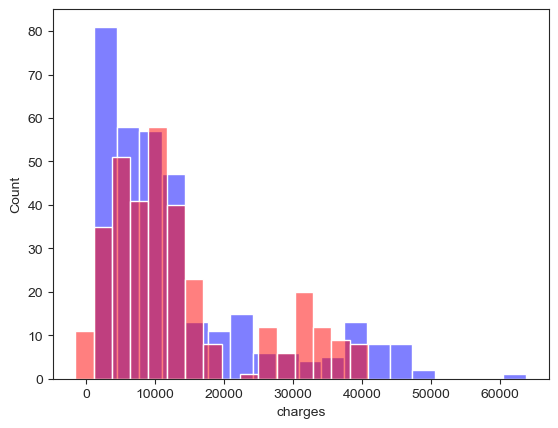

In [84]:
sns.histplot(y_test, color='blue',alpha=0.5)
sns.histplot(y_test_pred_lr, color='red',alpha=0.5)

In [85]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_lr))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_lr))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr)))

print('R2 Value:', metrics.r2_score(y_test, y_test_pred_lr))

Mean Absolute Error:  4243.654116653143
Mean Squared Error:  35117755.73613632
Root Mean Squared Error:  5926.023602394469
R2 Value: 0.7672642952734356


## KNN Regression

In [86]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train_transformed, y_train)
y_test_pred_knn = knn.predict(x_test_transformed)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_knn})
temp_df.head()

,Actual,Predicted
764,9095.06825,8506.576880
887,5272.17580,5637.408240
890,29330.98315,25167.105170
1293,9301.89355,13092.752768
259,33750.29180,24635.178840


<Axes: xlabel='charges', ylabel='Count'>

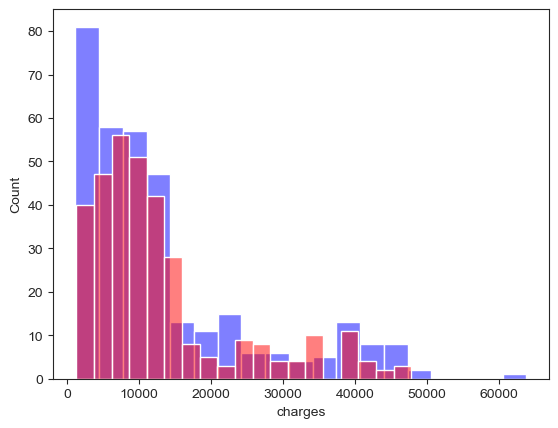

In [87]:
sns.histplot(y_test, color='blue',alpha=0.5)
sns.histplot(y_test_pred_knn, color='red',alpha=0.5)

In [88]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_knn))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_knn))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_knn)))

print('R2 Value:', metrics.r2_score(y_test, y_test_pred_knn))

Mean Absolute Error:  3557.025606014926
Mean Squared Error:  34175252.06607176
Root Mean Squared Error:  5845.960320261485
R2 Value: 0.7735105445357179


## Decision Tree Regression

In [89]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train_transformed, y_train)
y_test_pred_dt = dt.predict(x_test_transformed)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_dt})
temp_df.head()

,Actual,Predicted
764,9095.06825,9447.25035
887,5272.17580,5266.36560
890,29330.98315,28950.46920
1293,9301.89355,30284.64294
259,33750.29180,33732.68670


<Axes: xlabel='charges', ylabel='Count'>

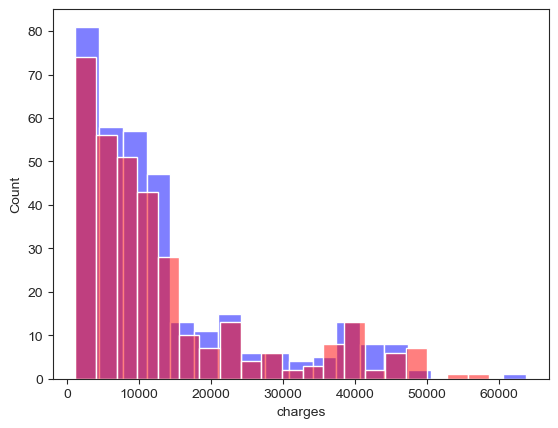

In [90]:
sns.histplot(y_test, color='blue',alpha=0.5)
sns.histplot(y_test_pred_dt, color='red',alpha=0.5)

In [91]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_dt))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_dt))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_dt)))

print('R2 Value:', metrics.r2_score(y_test, y_test_pred_dt))

Mean Absolute Error:  2846.1765628328358
Mean Squared Error:  39256324.71303687
Root Mean Squared Error:  6265.486789790309
R2 Value: 0.73983678041071


## Support Vector Regression

In [92]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train_transformed, y_train)
y_test_pred_svr = svr.predict(x_test_transformed)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_svr})
temp_df.head()

,Actual,Predicted
764,9095.06825,9435.946643
887,5272.17580,9398.309985
890,29330.98315,9507.316043
1293,9301.89355,9442.822335
259,33750.29180,9421.157063


<Axes: xlabel='charges', ylabel='Count'>

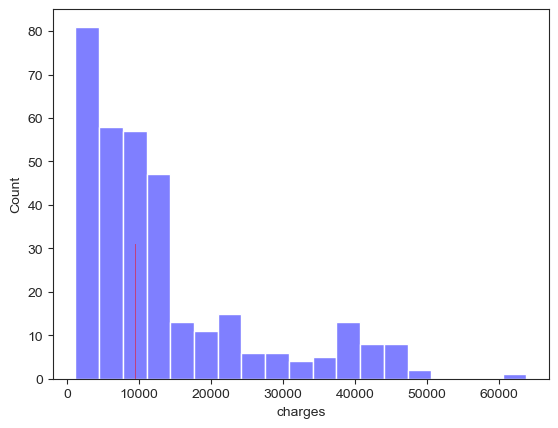

In [93]:
sns.histplot(y_test, color='blue',alpha=0.5)
sns.histplot(y_test_pred_svr, color='red',alpha=0.5)

In [94]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_svr))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_svr))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_svr)))

print('R2 Value:', metrics.r2_score(y_test, y_test_pred_svr))

Mean Absolute Error:  8479.648211519188
Mean Squared Error:  165076677.13076237
Root Mean Squared Error:  12848.216885263198
R2 Value: -0.0940117322592442


## Random Forest

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train_transformed, y_train)
y_test_pred_rf = rf.predict(x_test_transformed)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_rf})
temp_df.head()

,Actual,Predicted
764,9095.06825,9523.331152
887,5272.17580,5226.553414
890,29330.98315,28191.451105
1293,9301.89355,11874.108782
259,33750.29180,34846.999084


<Axes: xlabel='charges', ylabel='Count'>

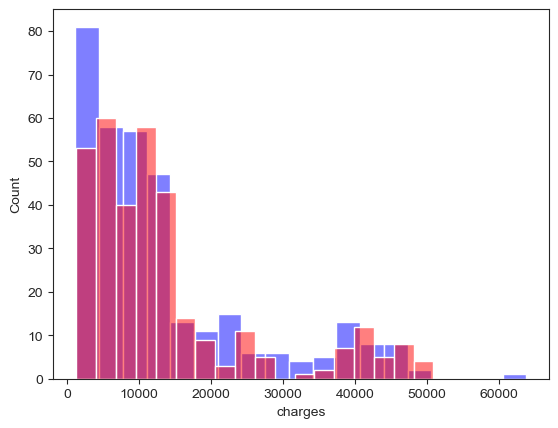

In [96]:
sns.histplot(y_test, color='blue',alpha=0.5)
sns.histplot(y_test_pred_rf, color='red',alpha=0.5)

In [97]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_rf))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_rf))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rf)))

print('R2 Value:', metrics.r2_score(y_test, y_test_pred_rf))

Mean Absolute Error:  2590.573663576492
Mean Squared Error:  22959335.38052644
Root Mean Squared Error:  4791.59006808037
R2 Value: 0.8478417259921333


## Gradient Boosting Regression

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(x_train_transformed, y_train)
y_test_pred_gb = gb.predict(x_test_transformed)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_gb})
temp_df.head()

,Actual,Predicted
764,9095.06825,10897.432134
887,5272.17580,5578.113163
890,29330.98315,28703.217151
1293,9301.89355,10075.428851
259,33750.29180,34160.127146


<Axes: xlabel='charges', ylabel='Count'>

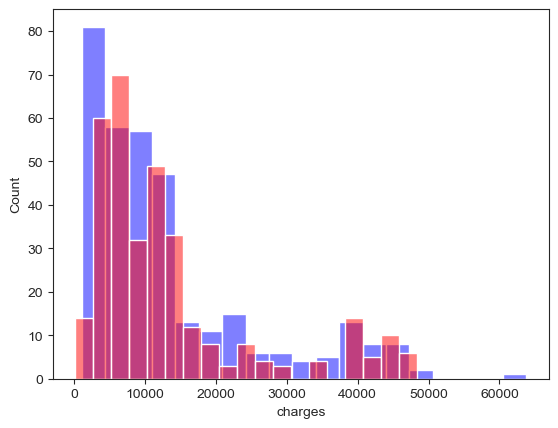

In [99]:
sns.histplot(y_test, color='blue',alpha=0.5)
sns.histplot(y_test_pred_gb, color='red',alpha=0.5)

In [100]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_gb))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_gb))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_gb)))

print('R2 Value:', metrics.r2_score(y_test, y_test_pred_gb))

Mean Absolute Error:  2545.625631926828
Mean Squared Error:  20944527.49360509
Root Mean Squared Error:  4576.519145989131
R2 Value: 0.8611944509491203


### Conclusion

From Mean Absolute Error values, we can see that Gradient Boosting Regression model is performing better than others and also it is having R2 score value of 0.861 which is again better than other models. Hence we will use Gradient Boosting Regression model.